### Import Libraries

In [1]:
## Major
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

## sklearn -- preparing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## sklearn -- metrics 
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score, precision_score, recall_score

## sklearn -- Dimens. Reduction
from sklearn.decomposition import PCA, SparsePCA, KernelPCA, MiniBatchDictionaryLearning, FastICA
from sklearn.random_projection import GaussianRandomProjection

### Read the Dataset

In [4]:
## Read the Dataset
FILE_PATH = os.path.join(os.getcwd(), 'credit_card.csv')
df_credit = pd.read_csv(FILE_PATH)

## check the head
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
## Check some info, datatypes and nulls
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
## Check some statistics about the data
df_credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Exploratory Data Anslysis (EDA)

### Prepare The Dataset
#### Standarize Before PCA

In [8]:
## Split the Data to Features and Target
X = df_credit.drop(columns=['Class'], axis=1)
y = df_credit['Class']

## Split the Dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2018, stratify=df_credit['Class'])

In [9]:
## Pipeline

num_pipeline = Pipeline(steps=[
                              ('scaler', StandardScaler())
                              ]
                        )
## fit and transform
X_train_final = num_pipeline.fit_transform(X_train)
X_test_final = num_pipeline.transform(X_test)

### Define Anomaly Detection Score Function

### Zero is normal and one is anomalous (and most likely to be fraudulent)

In [12]:
## Define a score function for anomaly detection
## let’s define the anomaly score as the (reconstruction error)
## The reconstruction error for each transaction is the sum of the squared differences 
## between the original feature matrix and the reconstructed matrix using the dimensionality reduction algorithm.
## I will scale the sum of the squared differences by the (max-min range) of the sum of the squared differences 
## for the entire dataset, so that all the reconstruction errors are within a zero to one range.

In [13]:
## Creat the Anomaly Function
def anomaly_scores(X_original, X_reconstructed):
    ''' This function is for getting the score for each instance in the dataset
        it compares the instance in the original dataset with the instance after reconstructed 
        using Dimensonality Reduction Algorithm.
        
        The Function normalize the output with the (max_min range, between 0-1)
        The loss = zero --> means that this instance is normal (not fraud) as the original is equal to reconstructed
        The loss = one  --> means that this instance is almost anomaly (fraud) as the original is not equal to reconstructed
        
    Args:
    *****
        (X_original: 2d NumPy array) --> The original Features of the Dataset
        (X_reconstructed: 2d NumPy array) --> The Reconstructed Features after applying Dimesn. Reduction Algorithm
    
    Returns:
    *******
        Returns the loss for each instance in range (0, 1), 0 is perfectly normal, 1 is perfectly anomaly.
        
    '''
    
    loss = np.sum((X_original - X_reconstructed)**2, axis=1)  ## axis=1 -- I need for each instance (take care)
    loss = (loss - np.min(loss)) / (np.max(loss) -  np.min(loss))  ## Normalize using (min-max range)
    return loss

### Define Evaluation Metrics

In [14]:
## Defina a full function for evaluation (plotting precision_recall curve, ROC_curve)
def evaluate_score(y_true, y_anomaly_scores, return_df=False):
    ''' This Function tries to plot both (precision_recall curve, ROC_curve), 
        and return df of both (y_true, y_anomaly_scores) if it is required
    Args:
    *****
        (y_true: 1D NumPy array) --> The True values (just for evaluating)
        (y_anomaly_scores: 1D NumPy array) --> The output from the previous Function (the anomaly scores for each instance)
        (return_df: boolean): If it is requires to return the concatenating (y_true, y_anomaly_scores) 
        
    Returns:
    ********
        Plotting of -- precision_recall curve & ROC_curve
    '''
    ## concat the true and scores
    df = pd.DataFrame({'True Labels': y_true, 'Anomaly Scores': y_anomaly_scores}).reset_index()
    df = df.drop(columns=['index'], axis=1)
    
    ## Precision and Recall curve
    precision, recall, thresholds = precision_recall_curve(y_true=df['True Labels'], probas_pred=df['Anomaly Scores'])
    
    ## Avearge Precision is the area under (precision-recall curve)
    average_precision = average_precision_score(y_true=df['True Labels'], y_score=df['Anomaly Scores'])

    ## Plotting the precision-recall curve
    plt.figure(figsize=(10, 6))
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
    plt.title(f'Precision-Recall curve: Average Precision = {average_precision:.2f}', fontsize=14)
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.grid('on')
    plt.show()


    ## ROC curve
    fpr, tpr, thresholds = roc_curve(y_true=df['True Labels'], y_score=df['Anomaly Scores'])
    ## area under curve
    auc = roc_auc_score(y_true=df['True Labels'], y_score=df['Anomaly Scores'])

    ## plotting roc curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='r', linewidth=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', linewidth=2, linestyle='--')
    plt.scatter(0, 0, s=40, c='k')
    plt.scatter(1, 1, s=40, c='k')
    plt.title(f'Receiver operating characteristic: Area under the curve {auc:.2f}', fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate = Recall', fontsize=14)
    plt.legend(loc="lower right")
    plt.grid('on')
    plt.show()
    
    if return_df==True:
        return df

### Define a ScatterPlot Function to plot between the First & Second Component

In [15]:
## Define a ScatterPlot Fuction

def plot_two_comp(X_reduced, y_true, algo_name):
    ''' This Function tries to plot scatterPlot for First & Second Components using Dimen. Reduction Algorithm
        with diffrent colors according to the true labels (true labels in this project are just for evaluating)
    
    Args:
    *****
        (X_reduced: 2d NumPy array) ---> The reduced features after applying Dimen. Reduction Algorithm
        (y_true: 1D NumPy array) --> The True values (just for evaluating)
        
    Returns:
    ********
        ScatterPlot for the First & Second Vector according to each label
    '''
    ## Plotting the (First Vector & Second Vector) coressponding to each (label)
    df_two_vectors = pd.DataFrame(np.c_[X_reduced[:, [0, 1]], y_true], 
                                  columns=['First Vector', 'Second Vector', 'Label'])

    ## Plotting
    sns.lmplot(x='First Vector', y='Second Vector', hue='Label', data=df_two_vectors, fit_reg=False)
    plt.title(f'Using {algo_name}', fontsize=14, c='k')
    plt.show()

### PCA


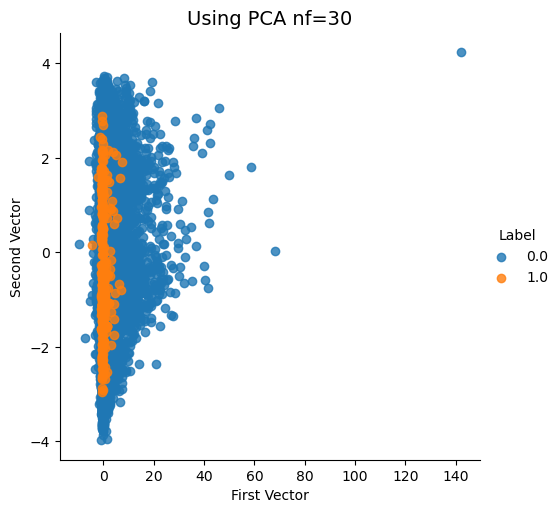

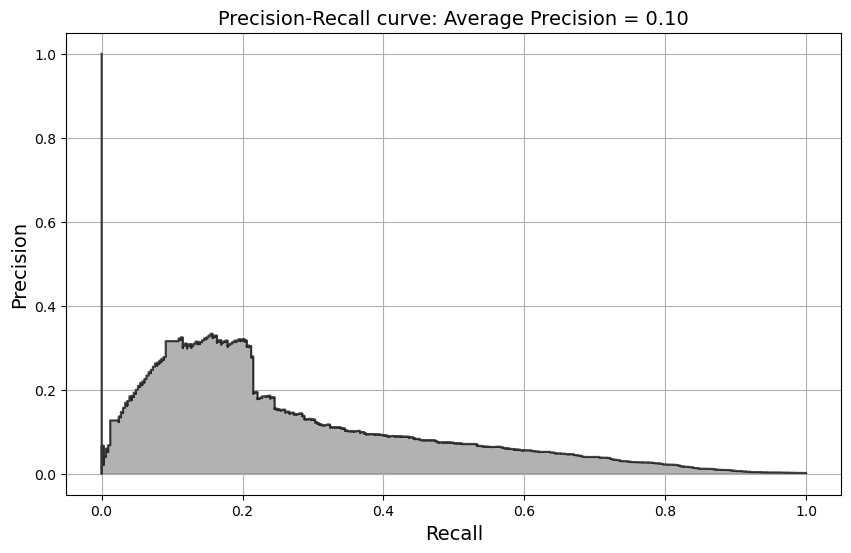

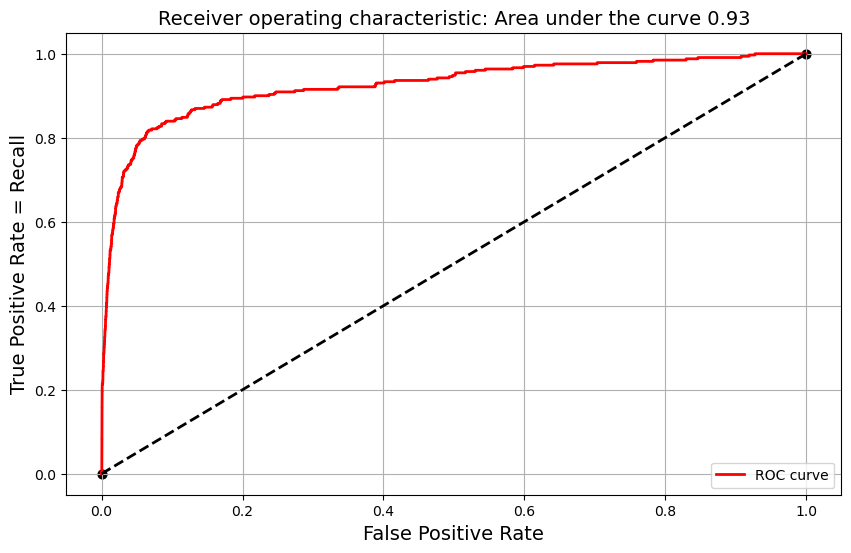

In [16]:
## Try PCA with 100% Features (30 Features)
pca_30 = PCA(n_components=30, random_state=45)

## Fit and transform for train, transform only for test
X_train_reduced_pca30 = pca_30.fit_transform(X_train_final)

## Inverse (Reconstruct)
X_train_inverse_pca30 = pca_30.inverse_transform(X_train_reduced_pca30)

## Call the ScatterPlot Function
plot_two_comp(X_reduced=X_train_reduced_pca30, y_true=y_train, algo_name='PCA nf=30')

## Getting Anomaly Scores -- call the function
y_scores_pca30 = anomaly_scores(X_original=X_train_final, X_reconstructed=X_train_inverse_pca30)

## Plotting Evaluation plots -- call the function
evaluate_score(y_true=y_train, y_anomaly_scores=y_scores_pca30)

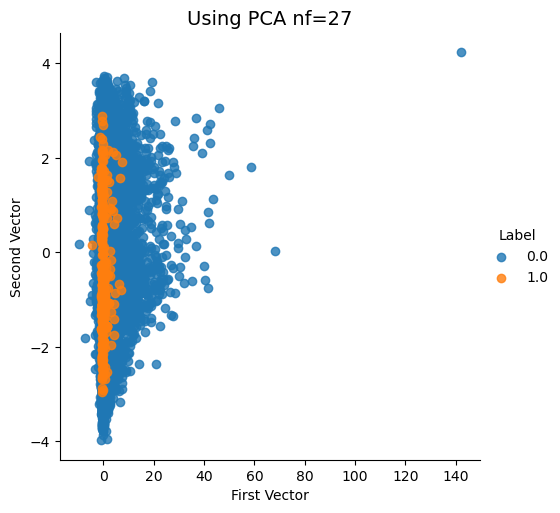

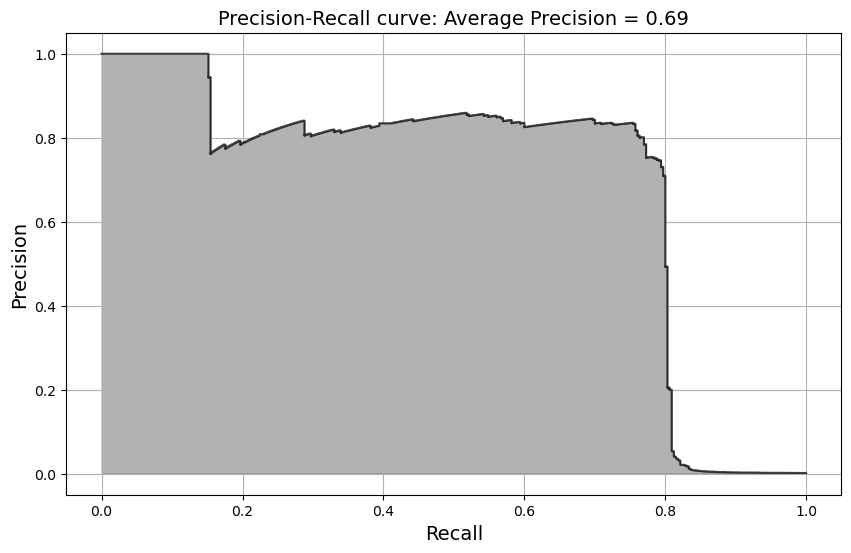

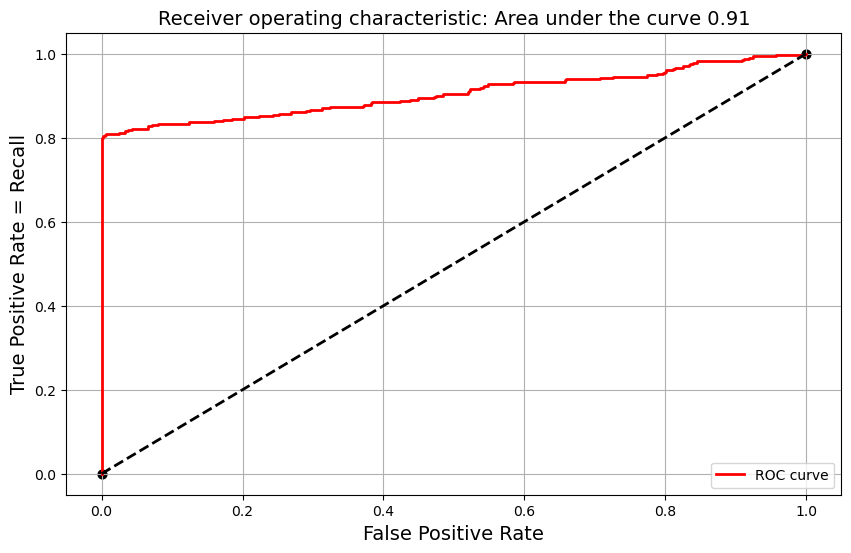

,True Labels,Anomaly Scores
0,0,0.000179
1,0,0.000029
2,0,0.000182
3,0,0.000135
4,0,0.000418
...,...,...
190815,0,0.000102
190816,0,0.000039
190817,0,0.000110
190818,0,0.000149


In [17]:
## Try PCA with 27 Features
pca_27 = PCA(n_components=27, random_state=2018)  ## The same random_state

## Fit and transform for train, transform only for test
X_train_reduced_pca_27 = pca_27.fit_transform(X_train_final)

## Inverse (Reconstruct)
X_train_inverse_pca_27 = pca_27.inverse_transform(X_train_reduced_pca_27)

## Call the ScatterPlot Function
plot_two_comp(X_reduced=X_train_reduced_pca_27, y_true=y_train, algo_name='PCA nf=27')

## Getting Anomaly Scores -- call the function
y_scores_pca27 = anomaly_scores(X_original=X_train_final, X_reconstructed=X_train_inverse_pca_27)

## Plotting Evaluation plots -- call the function
df_pca27 = evaluate_score(y_true=y_train, y_anomaly_scores=y_scores_pca27, return_df=True)
df_pca27

In [18]:
## Sort descending according to scores
df_pca27 = df_pca27.sort_values(by='Anomaly Scores', ascending=False)
df_pca27

,True Labels,Anomaly Scores
53084,1,1.000000e+00
155989,1,9.017986e-01
21774,1,9.017986e-01
87283,1,9.017986e-01
143493,1,9.017986e-01
...,...,...
62495,0,2.307548e-08
50570,0,2.291151e-08
110088,0,1.849888e-08
59785,0,3.777973e-09


### Sparse PCA


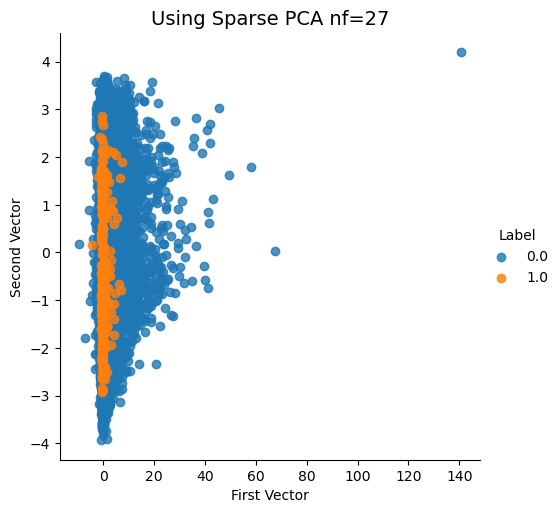

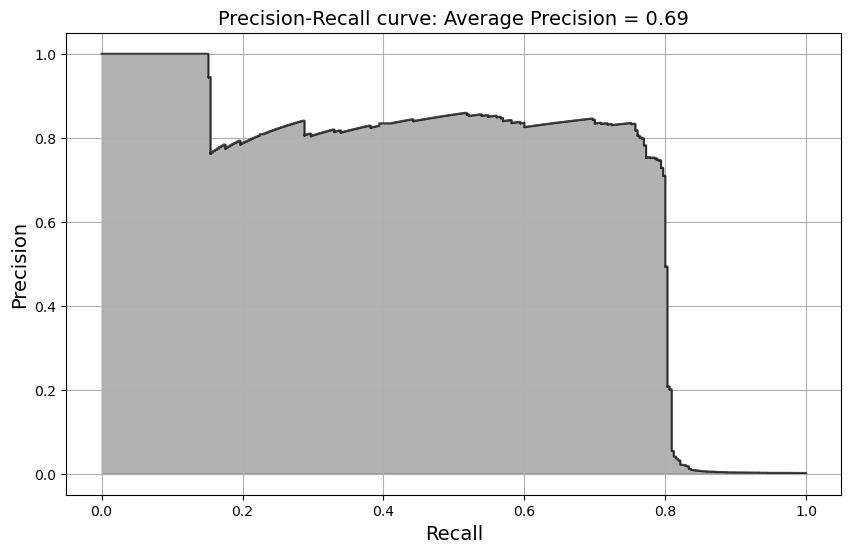

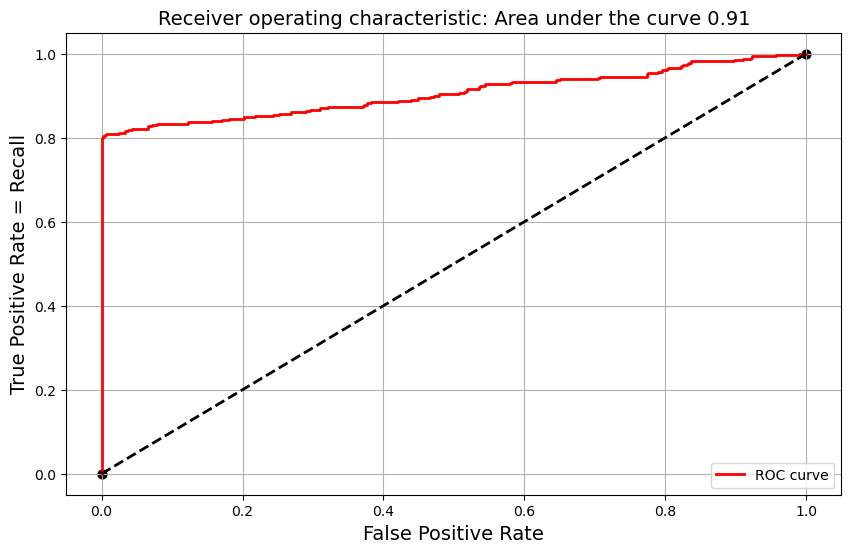

,True Labels,Anomaly Scores
0,0,0.000179
1,0,0.000030
2,0,0.000183
3,0,0.000135
4,0,0.000419
...,...,...
190815,0,0.000102
190816,0,0.000042
190817,0,0.000111
190818,0,0.000149


In [19]:
## alpha --> degree of sparsity
pca_sparse = SparsePCA(n_components=27, random_state=2018, n_jobs=-1, alpha=0.0001)

## Fit and transform for train, transform only for test
X_train_reduced_sparse = pca_sparse.fit_transform(X_train_final)

## SparsePCA -- doesn't have (inverse_transform) function We do it manually
## -- PCA (center the data (... - mean) "for each feature"), so I will add it manually 
X_train_inverse_sparse = (X_train_reduced_sparse @ pca_sparse.components_) + np.mean(X_train_final, axis=0) 

## Call the ScatterPlot Function
plot_two_comp(X_reduced=X_train_reduced_sparse, y_true=y_train, algo_name='Sparse PCA nf=27')


## Getting Anomaly Scores -- call the function
y_scores_sparse = anomaly_scores(X_original=X_train_final, X_reconstructed=X_train_inverse_sparse)

## Plotting Evaluation plots -- call the function
df_sparse = evaluate_score(y_true=y_train, y_anomaly_scores=y_scores_sparse, return_df=True)
df_sparse

### Kernel PCA


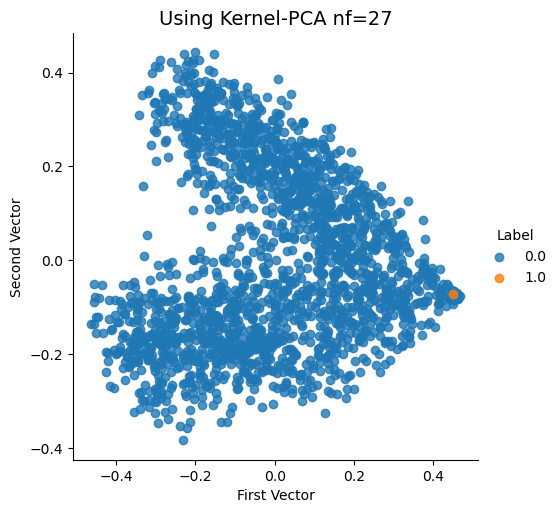

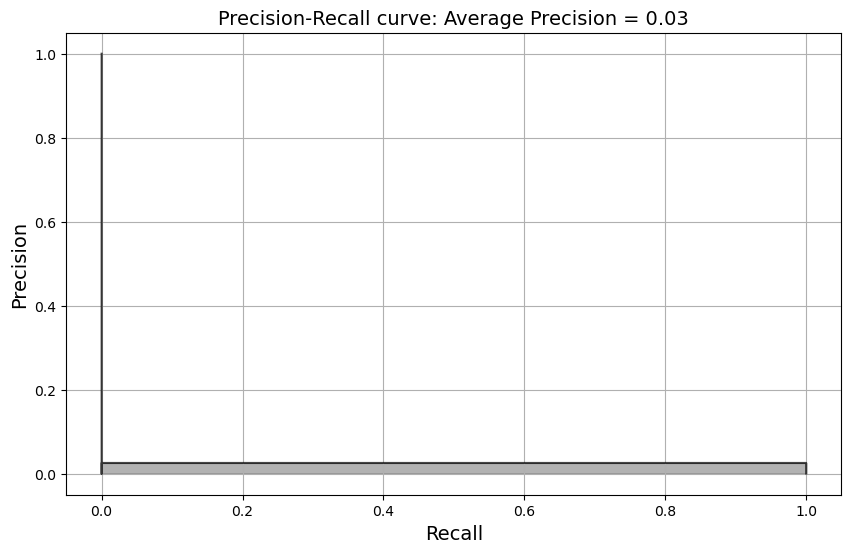

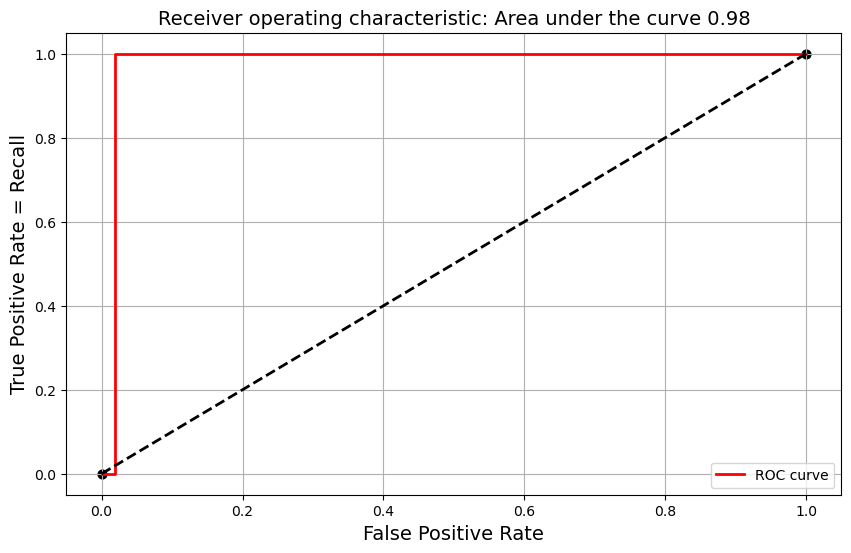

,True Labels,Anomaly Scores
0,0,0.000204
1,0,0.000050
2,0,0.003384
3,0,0.000054
4,0,0.000541
...,...,...
1995,0,0.001222
1996,0,0.000387
1997,0,0.000463
1998,0,0.001543


In [20]:
## Try to use KernelPCA
## Try (gamma) = 1/number of Features
## fit_inverse_transform=True --> to allow embeded function
pca_kernel = KernelPCA(n_components=27, random_state=2018, n_jobs=-1, kernel='rbf', gamma=None, fit_inverse_transform=True)

## Fit and transform for train, transform only for test
X_train_reduced_kernel = pca_kernel.fit_transform(X_train_final[:2000])  ## take much time (sliced to be fast)

## Inverse (Reconstruct)
X_train_inverse_kernel = pca_kernel.inverse_transform(X_train_reduced_kernel)

## Call the ScatterPlot Function
plot_two_comp(X_reduced=X_train_reduced_kernel, y_true=y_train[:2000], algo_name='Kernel-PCA nf=27')

## Getting Anomaly Scores -- call the function
y_scores_kernel = anomaly_scores(X_original=X_train_final[:2000], X_reconstructed=X_train_inverse_kernel)

## Plotting Evaluation plots -- call the function
df_kernel = evaluate_score(y_true=y_train[:2000], y_anomaly_scores=y_scores_kernel, return_df=True)
df_kernel

### Gaussian Random Projection


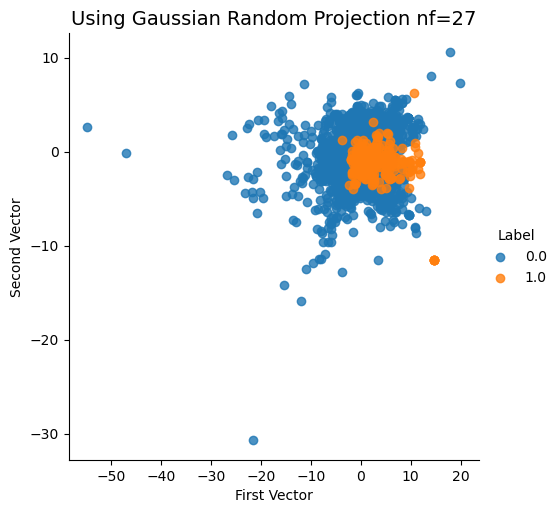

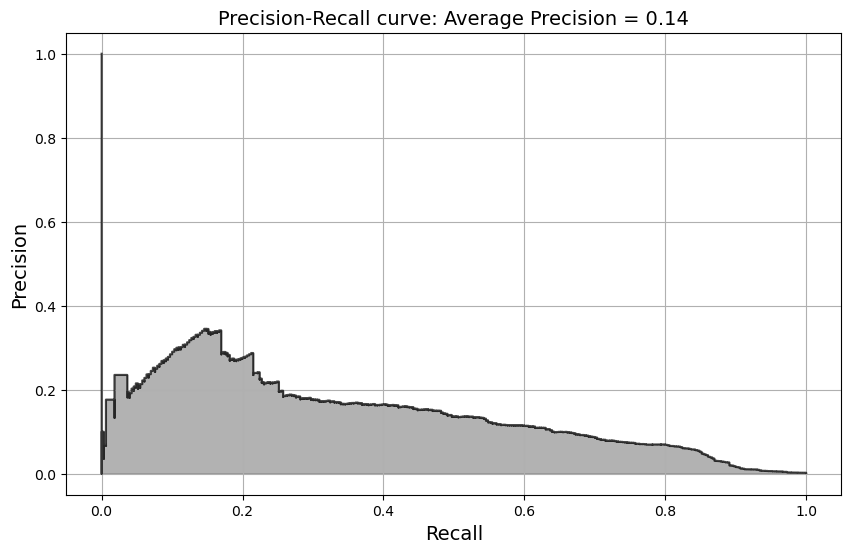

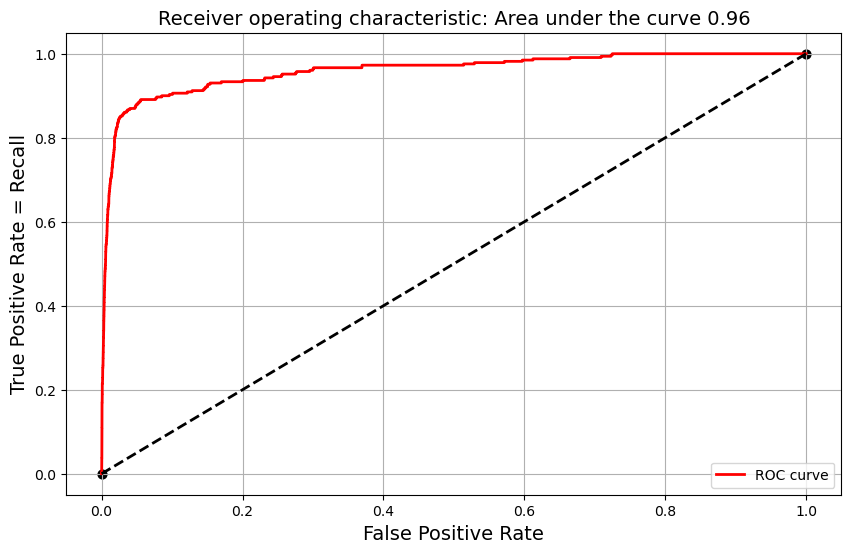

,True Labels,Anomaly Scores
0,0,0.000111
1,0,0.000099
2,0,0.000289
3,0,0.000098
4,0,0.000268
...,...,...
190815,0,0.000207
190816,0,0.000948
190817,0,0.000239
190818,0,0.000142


In [22]:
## Try to use Gaussian Random Projection

# Import the required class
from sklearn.random_projection import GaussianRandomProjection

# Create the Gaussian Random Projection object
# - n_components=27: reduce to 27 dimensions
# - random_state=2018: ensures reproducibility
# - eps parameter removed (not allowed in new sklearn versions)
gauss_proj = GaussianRandomProjection(n_components=27, random_state=2018)

## Fit and transform for train data
# This applies the random projection to your training data
# Note: it may take some time if your data is large
X_train_reduced_gauss = gauss_proj.fit_transform(X_train_final)

## Gaussian Random Projection -- doesn't have (inverse_transform) function
# We manually reconstruct the data using the components matrix
X_train_inverse_gauss = X_train_reduced_gauss @ gauss_proj.components_

## Call the ScatterPlot Function
# This will visualize the reduced data in 2D space
plot_two_comp(X_reduced=X_train_reduced_gauss,
              y_true=y_train,
              algo_name='Gaussian Random Projection nf=27')

## Getting Anomaly Scores
# Compute how much each sample differs from its reconstruction
y_scores_gauss = anomaly_scores(X_original=X_train_final,
                                X_reconstructed=X_train_inverse_gauss)

## Plotting Evaluation Plots
# Evaluate the anomaly detection performance and return a dataframe
df_gauss = evaluate_score(y_true=y_train,
                          y_anomaly_scores=y_scores_gauss,
                          return_df=True)

# Display the resulting evaluation dataframe
df_gauss


### Dictionary Learning
#### NonLinear Dimens. Reduction



C:\Users\youse\anaconda3\Lib\site-packages\sklearn\decomposition\_dict_learning.py:2303: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(


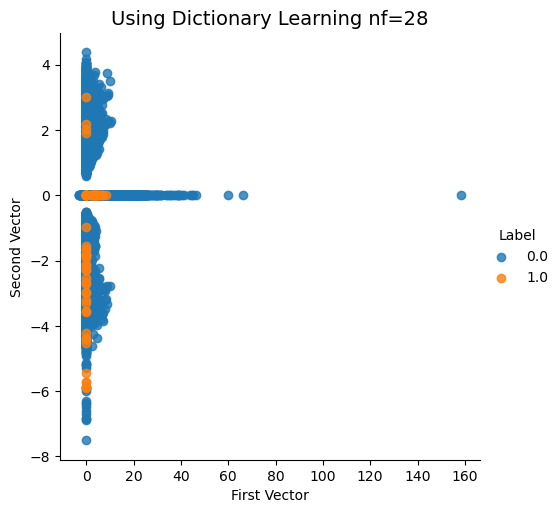

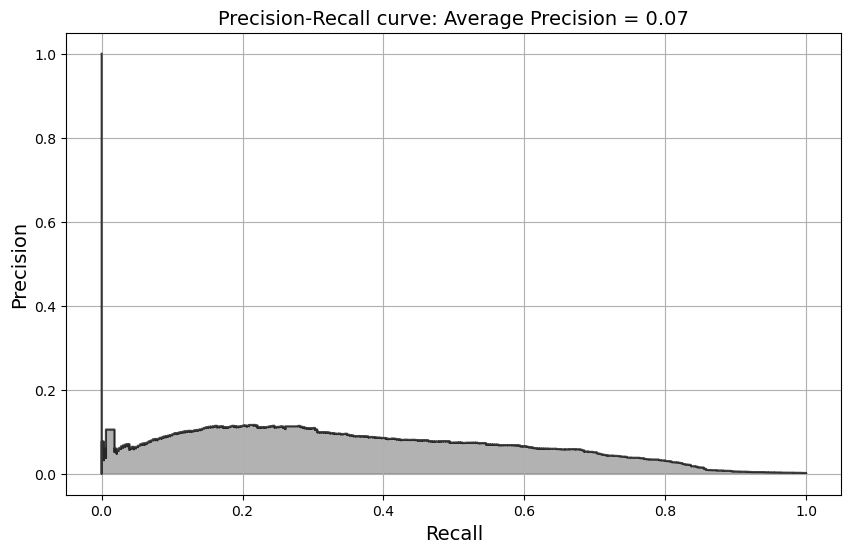

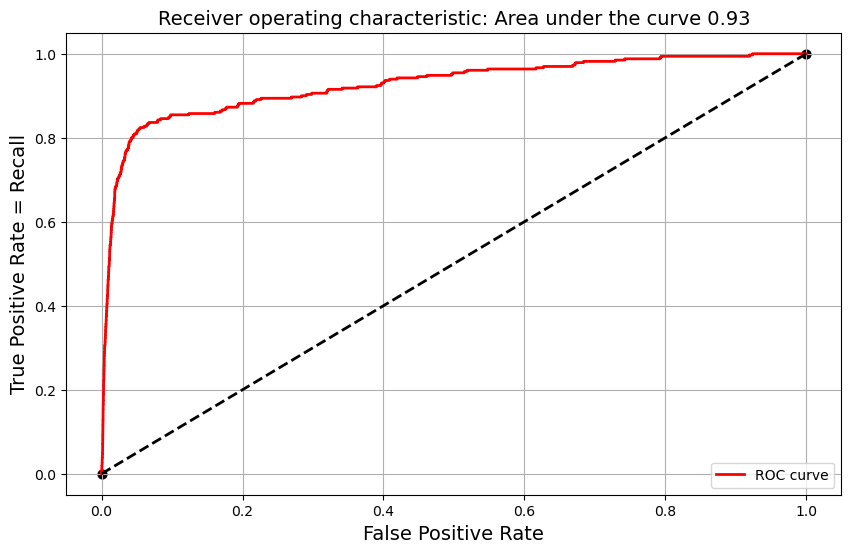

,True Labels,Anomaly Scores
0,0,0.000363
1,0,0.000498
2,0,0.002316
3,0,0.000374
4,0,0.000911
...,...,...
190815,0,0.000893
190816,0,0.000987
190817,0,0.001039
190818,0,0.000734


In [23]:
## Dictionary Learning is method for non-linear dimens. reduction (manifold)
## In our case, we will generate 28 vectors (or components). 
## To learn the dictionary, we will feed in 10 batches, where each batch has 200 samples.
dict_learn = MiniBatchDictionaryLearning(n_components=27, random_state=2018, n_jobs=-1, n_iter=10, batch_size=200, alpha=1)

## Fit and transform for train, transform only for test
X_train_reduced_dict = dict_learn.fit_transform(X_train_final)  ## take much time (sliced to be fast)

## Dictionary Learning -- doesn't have (inverse_transform) function We do it manually
X_train_inverse_dict = (X_train_reduced_dict @ dict_learn.components_)

## Call the ScatterPlot Function
plot_two_comp(X_reduced=X_train_reduced_dict, y_true=y_train, algo_name='Dictionary Learning nf=28')

## Getting Anomaly Scores -- call the function
y_scores_dict = anomaly_scores(X_original=X_train_final, X_reconstructed=X_train_inverse_dict)

## Plotting Evaluation plots -- call the function
df_dict = evaluate_score(y_true=y_train, y_anomaly_scores=y_scores_dict, return_df=True)
df_dict

### Independent Component Analysis (ICA)


C:\Users\youse\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


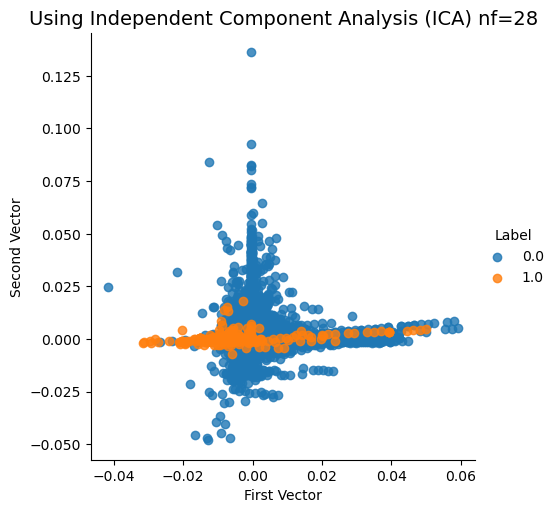

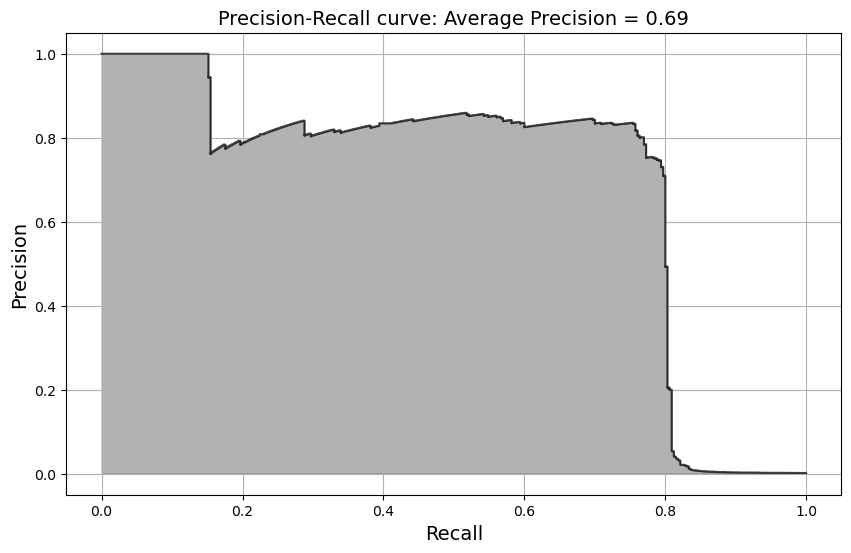

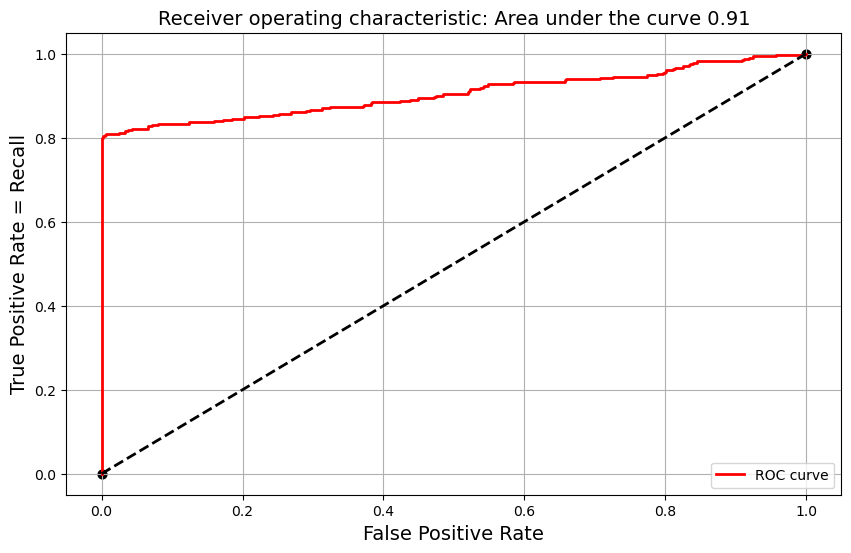

,True Labels,Anomaly Scores
0,0,0.000179
1,0,0.000029
2,0,0.000182
3,0,0.000135
4,0,0.000418
...,...,...
190815,0,0.000102
190816,0,0.000039
190817,0,0.000110
190818,0,0.000149


In [24]:
## try ICA (ICA is familiar for signal processing)
ica = FastICA(n_components=27, algorithm='parallel', max_iter=200, random_state=2018)

## Fit and transform for train, transform only for test
X_train_reduced_ica = ica.fit_transform(X_train_final)  ## take much time (sliced to be fast)

## Dictionary Learning -- doesn't have (inverse_transform) function We do it manually
X_train_inverse_ica = ica.inverse_transform(X_train_reduced_ica)

## Call the ScatterPlot Function
plot_two_comp(X_reduced=X_train_reduced_ica, y_true=y_train, algo_name='Independent Component Analysis (ICA) nf=28')

## Getting Anomaly Scores -- call the function
y_scores_ica = anomaly_scores(X_original=X_train_final, X_reconstructed=X_train_inverse_ica)

## Plotting Evaluation plots -- call the function
df_ica = evaluate_score(y_true=y_train, y_anomaly_scores=y_scores_ica, return_df=True)
df_ica

### The Results using Normal PCA is almost the same using ICA --- (The best results)

## Inspired by a Udemy course by Mohammed Agoor.
